In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
basepath = Path("/home/unix/wangyanz/codon_usage/scRNA")
data_pool = basepath.joinpath("data")
cell_type_pool = data_pool.joinpath("cell_type")
pics_dir = data_pool.joinpath("pics")
if not os.path.exists(pics_dir):
    os.mkdir(pics_dir)
tag = "scRNA_Muris_10X_v2"
amino_acid_usage_file = data_pool.joinpath(f"amino_acid_composition_{tag}.csv")
codon_usage_file = data_pool.joinpath(f"codon_frequence_{tag}.csv")
codon_usage_raw_file = data_pool.joinpath(f"codon_frequence_raw_{tag}.csv")

In [24]:
codon_usage = pd.read_csv(codon_usage_file, index_col=0).iloc[:,-55:]
amino_acid_usage = pd.read_csv(amino_acid_usage_file, index_col=0).iloc[:,-55:]
codon_usage_raw = pd.read_csv(codon_usage_raw_file, index_col=0).iloc[:,:-1]

In [25]:
def PCA_trans(data):
    pca = PCA(n_components=2)
    pca.fit(data)
    codon_usage_pca = pca.transform(data)
    return codon_usage_pca

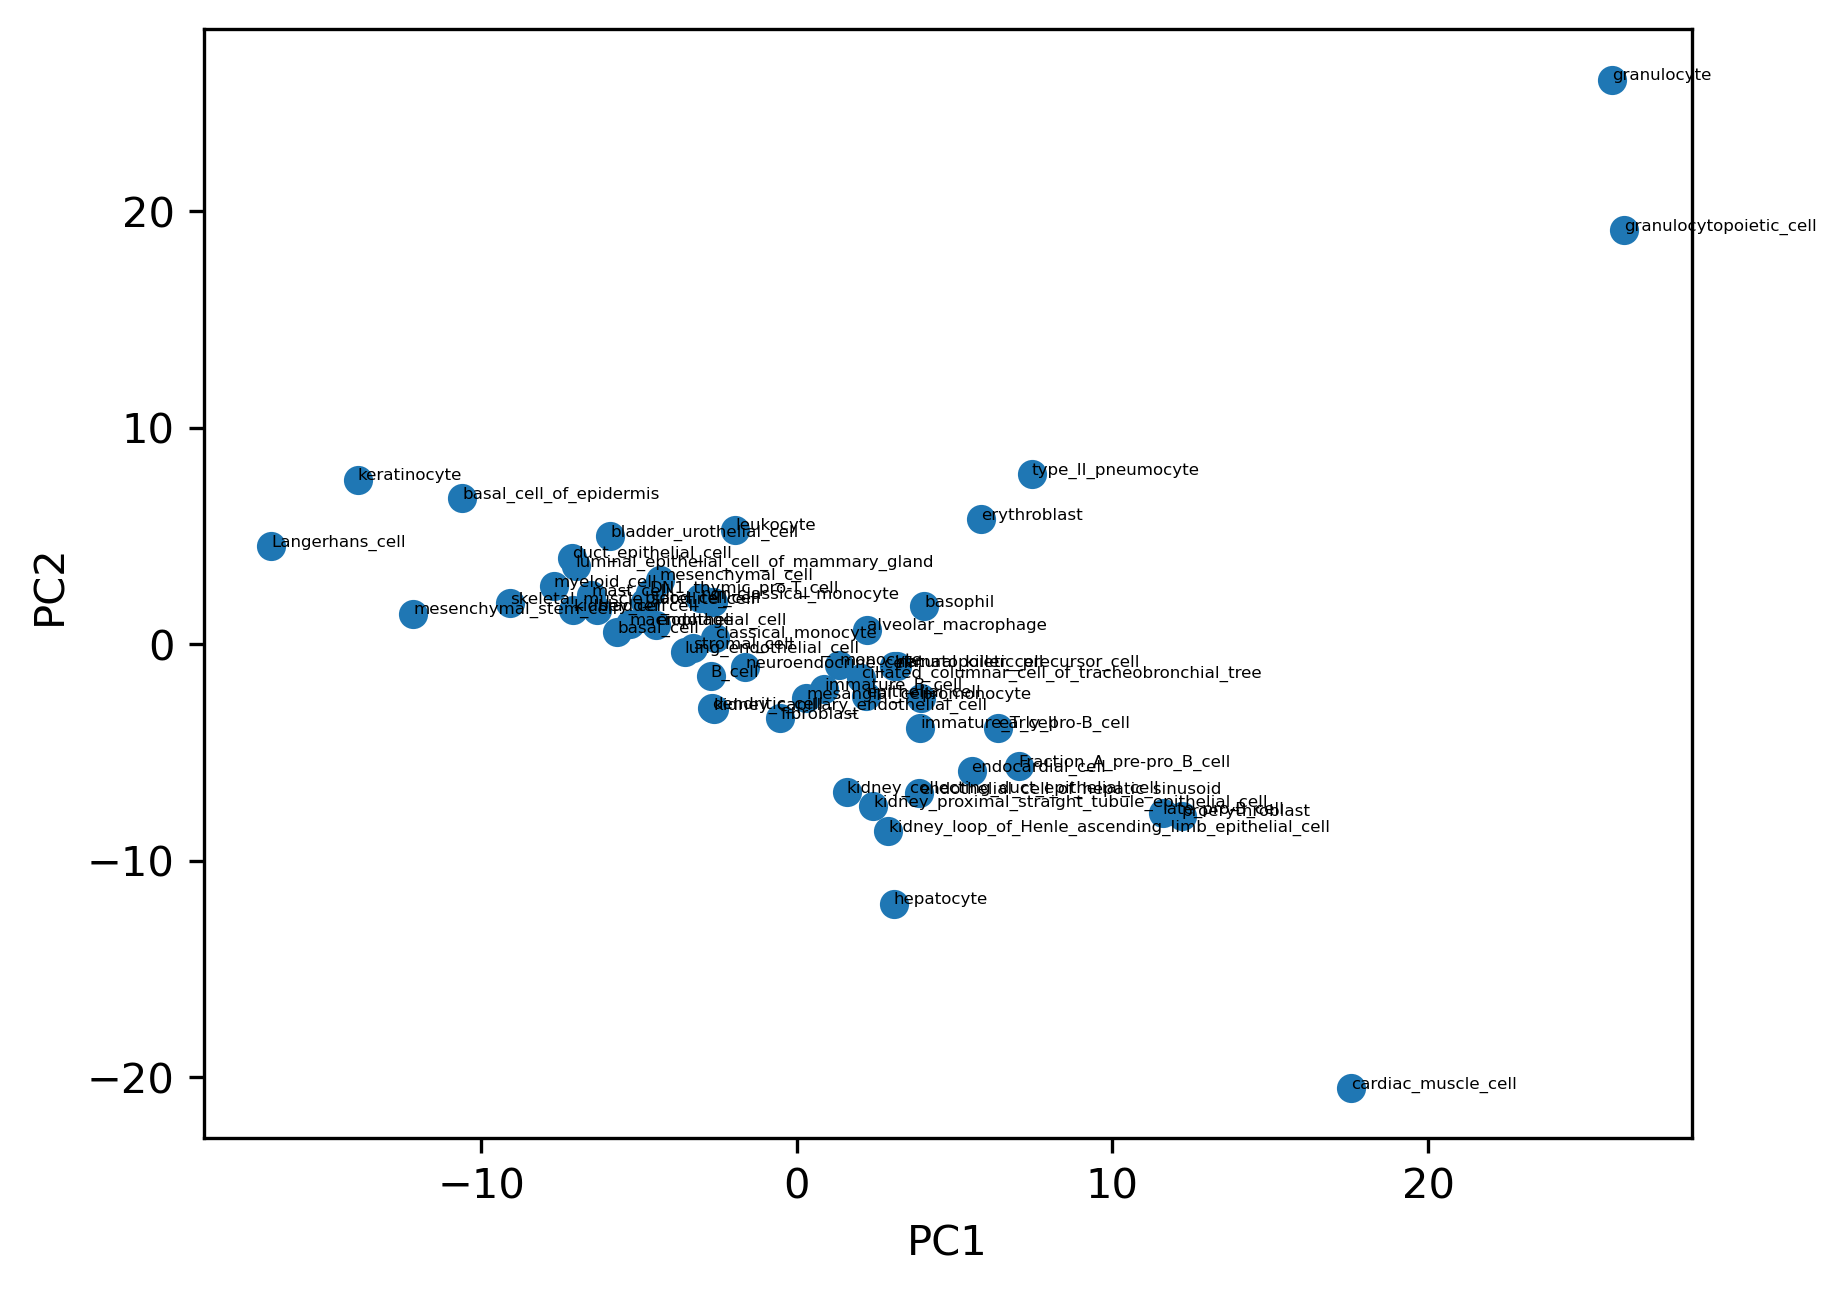

In [29]:
codon_usage_pca = PCA_trans(codon_usage.T)
plt.figure(dpi=300)
plt.scatter(codon_usage_pca[:,0], codon_usage_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(codon_usage_pca[idx,0], codon_usage_pca[idx,1], key, fontsize=4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

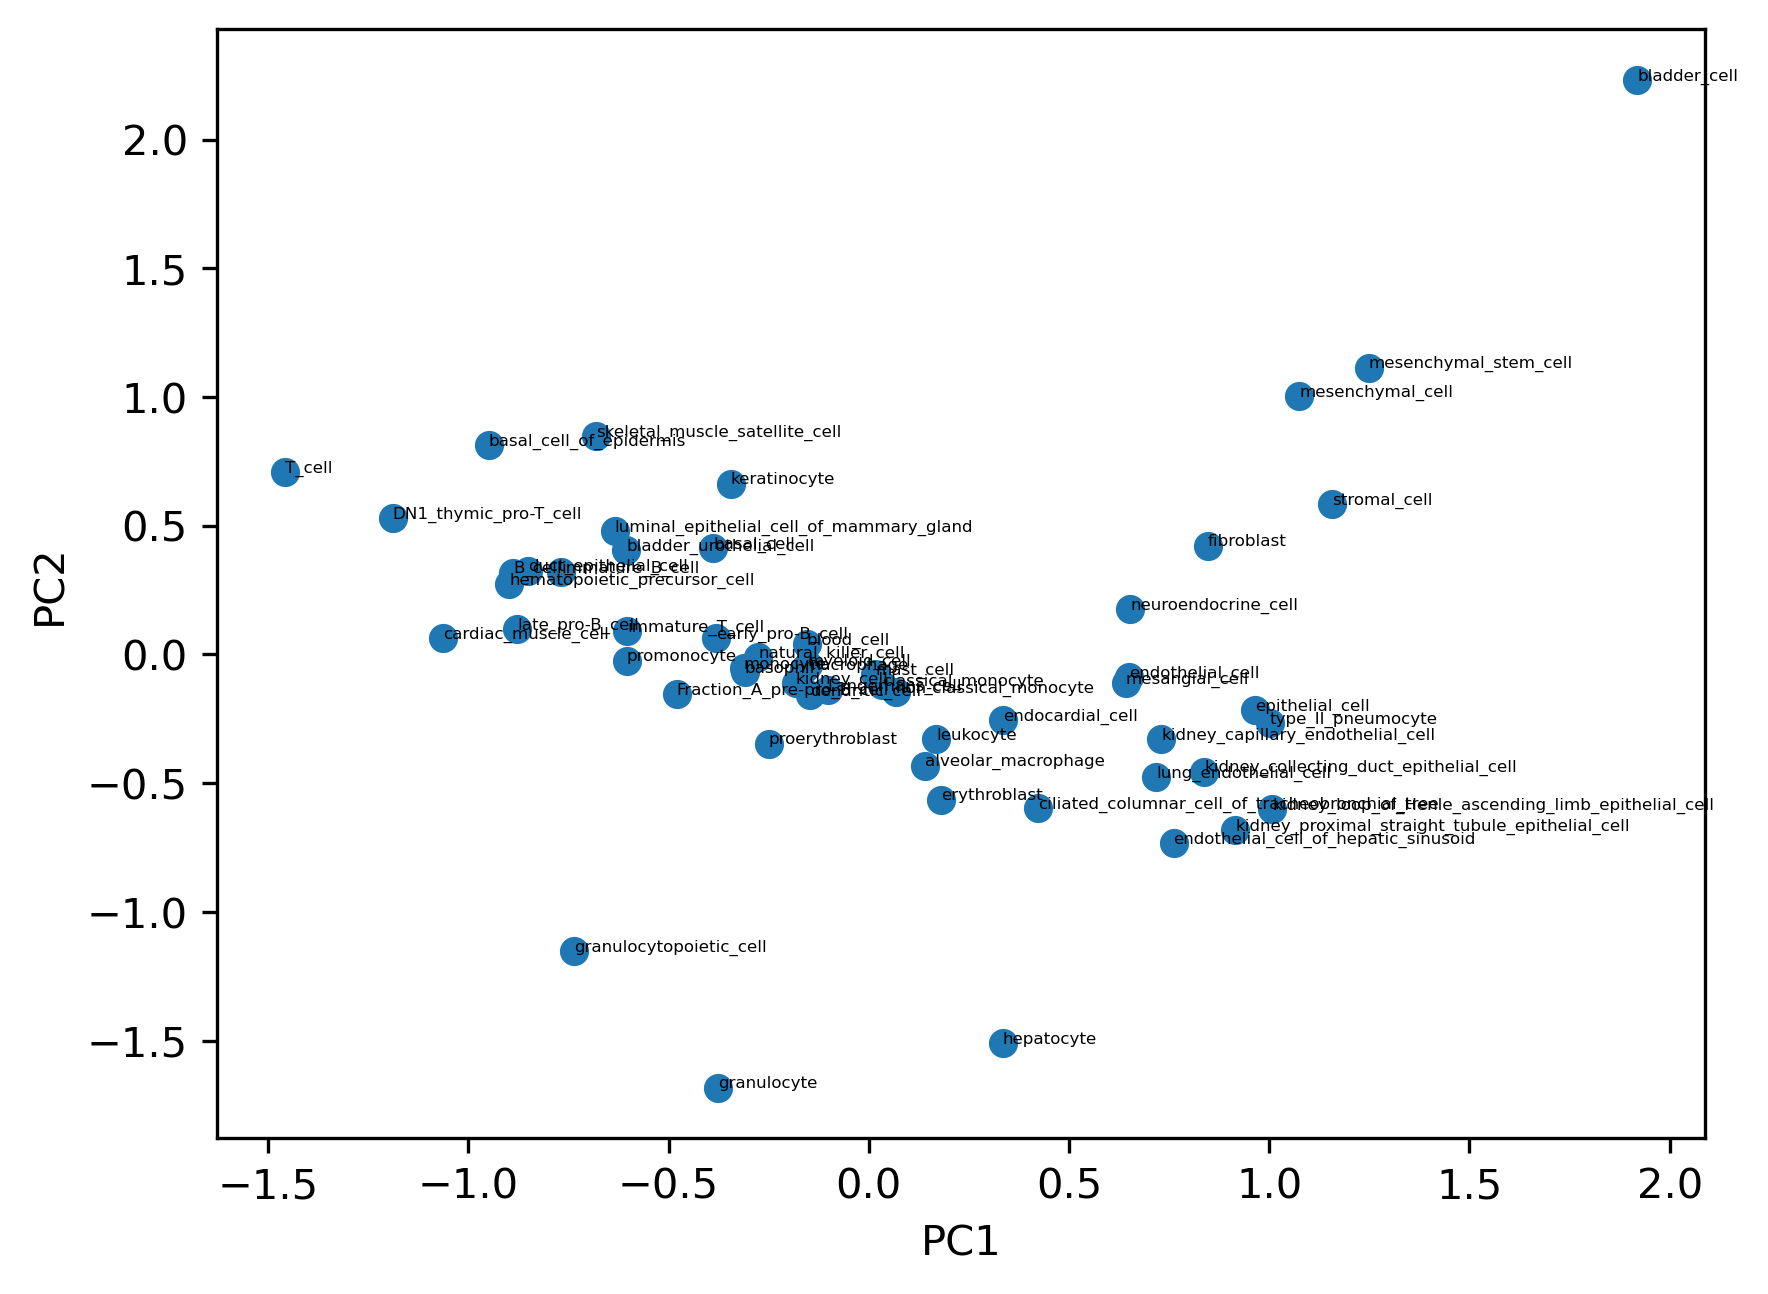

In [31]:
amino_acid_usage_pca = PCA_trans(amino_acid_usage.T)
plt.figure(dpi=300)
plt.scatter(amino_acid_usage_pca[:,0], amino_acid_usage_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(amino_acid_usage_pca[idx,0], amino_acid_usage_pca[idx,1], key, fontsize=4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

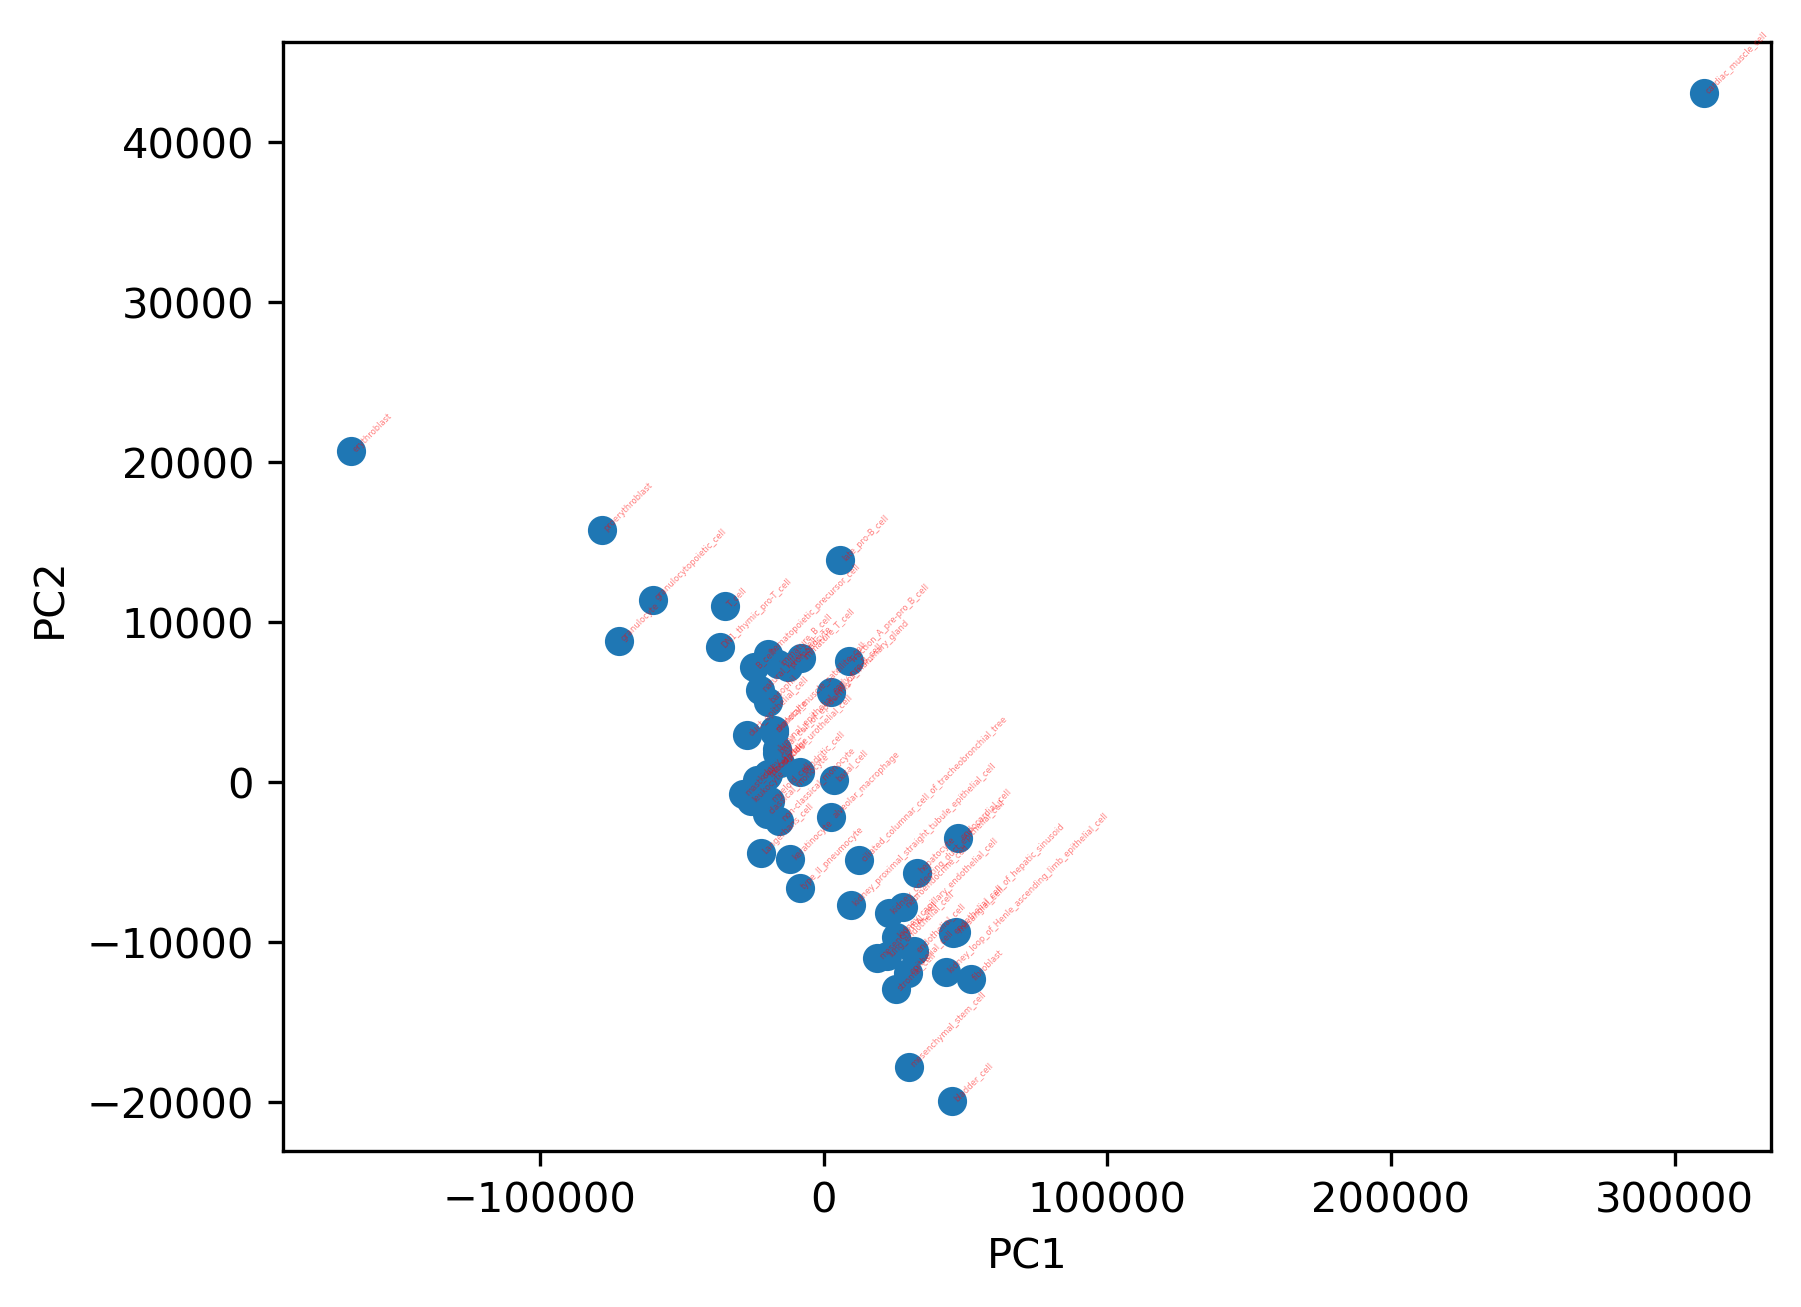

In [43]:
codon_usage_raw_pca = PCA_trans(codon_usage_raw.T)
plt.figure(dpi=300)
plt.scatter(codon_usage_raw_pca[:,0], codon_usage_raw_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(codon_usage_raw_pca[idx,0], codon_usage_raw_pca[idx,1], key,  fontsize=2, color="red", alpha=0.5, rotation=45, )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()